In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
# Importing Seaborn Library
import seaborn as sns

# Get the data analyst job in india
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop Not A Number Values from the dataset
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])


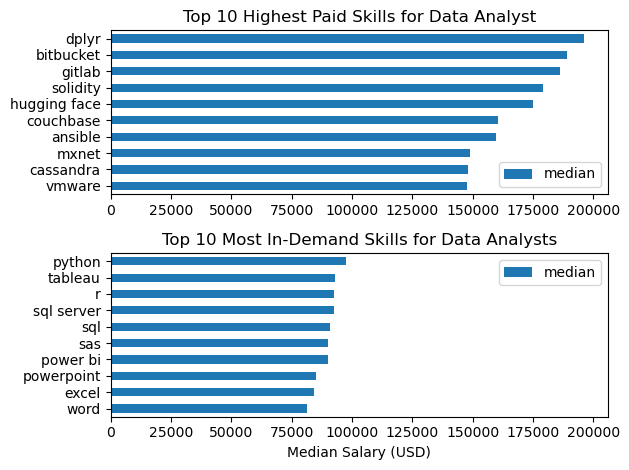

In [3]:
df_da_us = df_da_us.explode('job_skills')
df_da_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)

df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_da_skills = df_da_skills.head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for Data Analysts
df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# Top 10 Most In-Demand Skills for Data Analysts
df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()
plt.show()

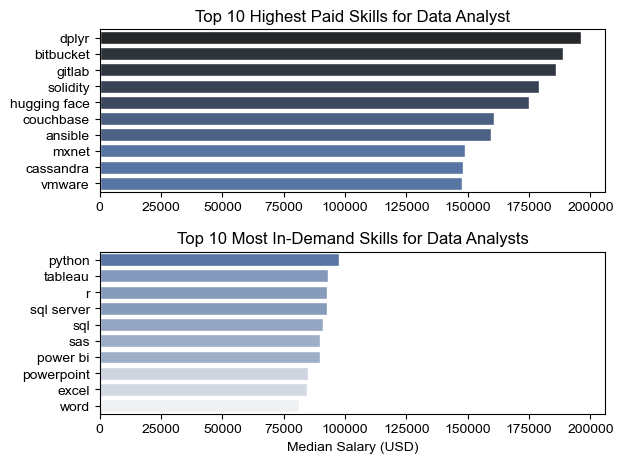

In [12]:
# Modifying into a seaborn plot
fig, ax = plt.subplots(2, 1)

# Setting the Theme for the plot
sns.set_theme(style='ticks')

sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

#df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

# Top 10 Most In-Demand Skills for Data Analysts
#df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Jobs')

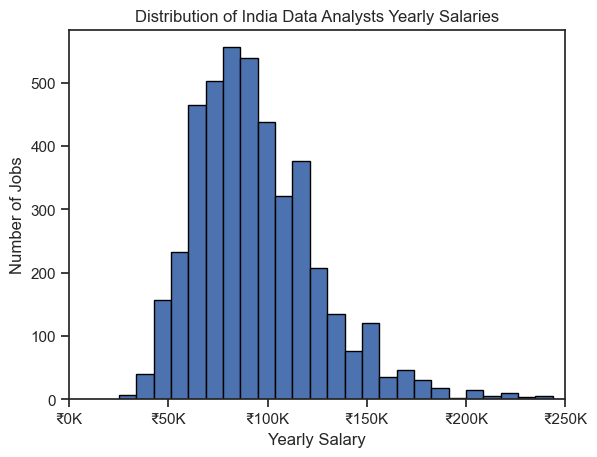

In [15]:
# Get the data analyst job in the United States
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Getting average salary yearly
df_da_us['salary_year_avg'] = df_da_us['salary_year_avg']
df_da_us['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')

# Clearing the outliers from data
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'₹{int(x/1000)}K' ))

plt.title('Distribution of United States Data Analysts Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

Text(12.444444444444445, 0.5, 'Number of Jobs')

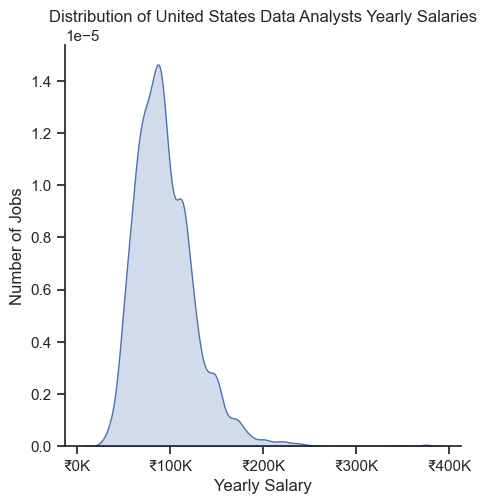

In [18]:
# Modifying the histplot to a seaborn
sns.displot(df_da_us['salary_year_avg'], kind='kde', fill=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'₹{int(x/1000)}K'))
plt.title('Distribution of United States Data Analysts Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')